
1.1. Outliers (IQR):
    Values
7     100


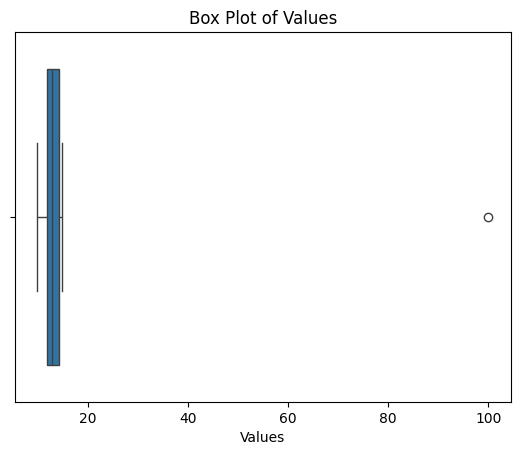


3.1. DataFrame after removing outliers:
     Values
0       10
1       12
2       12
3       13
4       12
5       14
6       15
8       12
9       13
10      14
11      15

3.2. DataFrame after capping outliers:
     Values  Capped_Values
0       10         10.000
1       12         12.000
2       12         12.000
3       13         13.000
4       12         12.000
5       14         14.000
6       15         15.000
7      100         17.625
8       12         12.000
9       13         13.000
10      14         14.000
11      15         15.000

4.1. DataFrame after logarithmic transformation:
     Values  Capped_Values  Log_Values
0       10         10.000    2.302585
1       12         12.000    2.484907
2       12         12.000    2.484907
3       13         13.000    2.564949
4       12         12.000    2.484907
5       14         14.000    2.639057
6       15         15.000    2.708050
7      100         17.625    4.605170
8       12         12.000    2.484907
9       13      

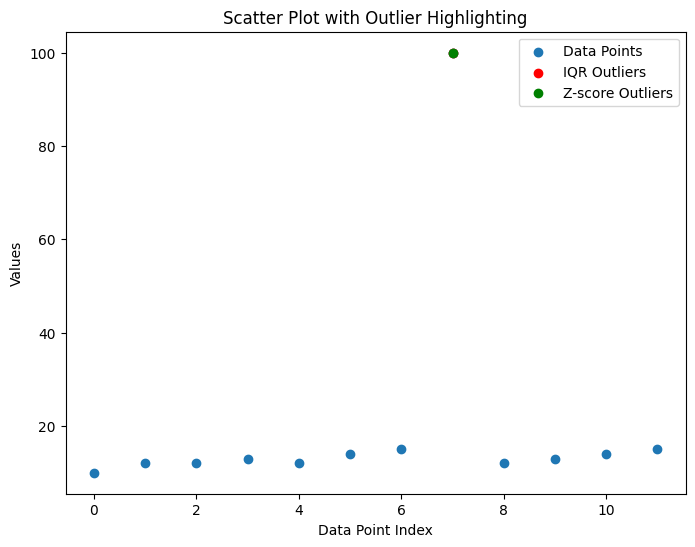

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Identifying Outliers (IQR)
data = {
    'Values': [10, 12, 12, 13, 12, 14, 15, 100, 12, 13, 14, 15]
}
df = pd.DataFrame(data)

Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Values'] < lower_bound) | (df['Values'] > upper_bound)]
print("\n1.1. Outliers (IQR):\n", outliers)

# 2. Visualizing Outliers
sns.boxplot(x=df['Values'])
plt.title('Box Plot of Values')
plt.show()

# 3. Handling Outliers
# 3.1. Removal
df_no_outliers = df[(df['Values'] >= lower_bound) & (df['Values'] <= upper_bound)]
print("\n3.1. DataFrame after removing outliers:\n", df_no_outliers)

# 3.2. Capping
df['Capped_Values'] = df['Values'].clip(lower=lower_bound, upper=upper_bound)
print("\n3.2. DataFrame after capping outliers:\n", df)

# 4. Transforming Data
df['Log_Values'] = df['Values'].apply(lambda x: np.log(x) if x > 0 else 0)
print("\n4.1. DataFrame after logarithmic transformation:\n", df)

# 5. Summary Statistics Without Outliers
summary_stats = df_no_outliers.describe()
print("\n5.1. Summary statistics without outliers:\n", summary_stats)



# Example with Z-score outlier detection

def detect_outliers_zscore(data, threshold=3):
    z = np.abs((data - data.mean()) / data.std())
    outliers = data[z > threshold]
    return outliers

outliers_zscore = detect_outliers_zscore(df['Values'])
print("\nOutliers (Z-score):\n", outliers_zscore)

# Visualizing outliers with a scatter plot

plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Values'], label='Data Points') #All points
plt.scatter(outliers.index, outliers['Values'], color='red', label='IQR Outliers') #Outliers detected by IQR
plt.scatter(outliers_zscore.index, outliers_zscore, color='green', label='Z-score Outliers') #Outliers detected by Z-score

plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title('Scatter Plot with Outlier Highlighting')
plt.legend()
plt.show()